In [1]:
import pandas as pd
df = pd.read_csv("annual-freshwater-withdrawals (2).csv")
df.head(), df.columns

(        Entity Code  Year  \
 0  Afghanistan  AFG  1975   
 1  Afghanistan  AFG  1976   
 2  Afghanistan  AFG  1977   
 3  Afghanistan  AFG  1978   
 4  Afghanistan  AFG  1979   
 
    Annual freshwater withdrawals, total (billion cubic meters)  
 0                                       1.070000e+10            
 1                                       1.198426e+10            
 2                                       1.326852e+10            
 3                                       1.455278e+10            
 4                                       1.583703e+10            ,
 Index(['Entity', 'Code', 'Year',
        'Annual freshwater withdrawals, total (billion cubic meters)'],
       dtype='object'))

In [48]:
!pip install pmdarima

# Calling ADFuller function to check stationarity 

In [2]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Annual freshwater withdrawals, total (billion cubic meters)'])

In [3]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adfuller_test(df['Annual freshwater withdrawals, total (billion cubic meters)'])

ADF Test Statistic : -10.92765921089575
p-value : 1.0006656867651045e-19
#Lags Used : 31
Number of Observations Used : 5990
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Plotting Autocorrelation and Partial Autocorrelation Curve

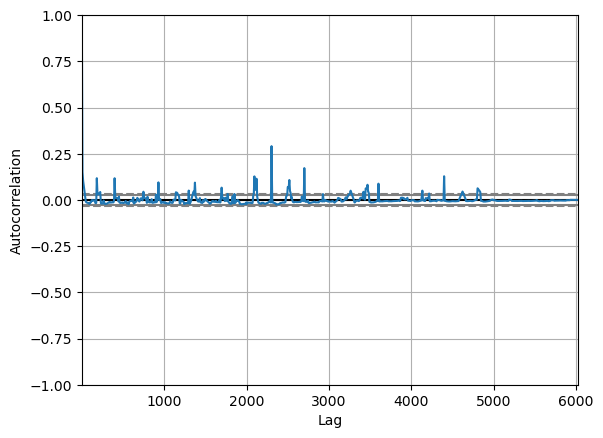

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Annual freshwater withdrawals, total (billion cubic meters)'])
plt.show()

In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


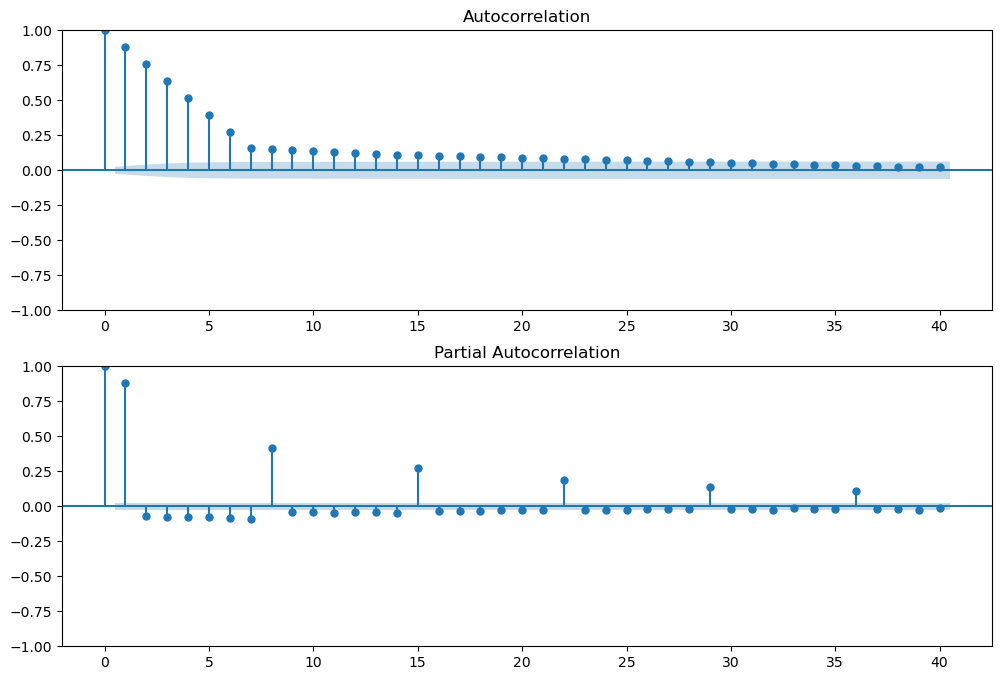

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Annual freshwater withdrawals, total (billion cubic meters)'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Annual freshwater withdrawals, total (billion cubic meters)'],lags=40,ax=ax2)

# Building ARIMA Model and Making Predictions for UN Nations (China, France, Russia, the United Kingdom, and the United States)

#   

# China

In [45]:
from pmdarima import auto_arima
# Auto ARIMA to suggest the best p, d, q values
auto_model = auto_arima(df_chn['Water_Withdrawal'], seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -950.506
Date:                Sun, 15 Sep 2024   AIC                           1903.012
Time:                        15:30:06   BIC                           1904.675
Sample:                             0   HQIC                          1903.608
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.212e+19   7.31e+18     11.235      0.000    6.78e+19    9.64e+19
Ljung-Box (L1) (Q):                   5.02   Jarque-Bera (JB):               164.61
Prob(Q):                              0.03   Pr

In [61]:
from statsmodels.tsa.arima.model import ARIMA
df_chn = df[df['Code'] == 'CHN'] # Filter dataset for china
df_chn = df_chn.drop_duplicates(subset='Year').set_index('Year') #drop duplicates based on the 'Year' column
df_chn['Water_Withdrawal'] = df_chn['Annual freshwater withdrawals, total (billion cubic meters)']

# ARIMA model (p=1, d=0, q=1)
model = ARIMA(df_chn['Water_Withdrawal'], order=(0, 2, 0))
model_fit = model.fit()
model_fit.summary()


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Water_Withdrawal   No. Observations:                   41
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -950.506
Date:                Sun, 15 Sep 2024   AIC                           1903.012
Time:                        15:59:25   BIC                           1904.675
Sample:                             0   HQIC                          1903.608
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.212e+19   7.31e+18     11.235      0.000    6.78e+19    9.64e+19
===================================================================================
Ljung-Box (L1) (Q):                   5.02   Jarque-Bera (JB):               164.61
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):              44.65   Skew:                            -2.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
adfuller_test(df_chn['Water_Withdrawal'])

ADF Test Statistic : -2.492255324071381
p-value : 0.11737007781606484
#Lags Used : 9
Number of Observations Used : 29


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


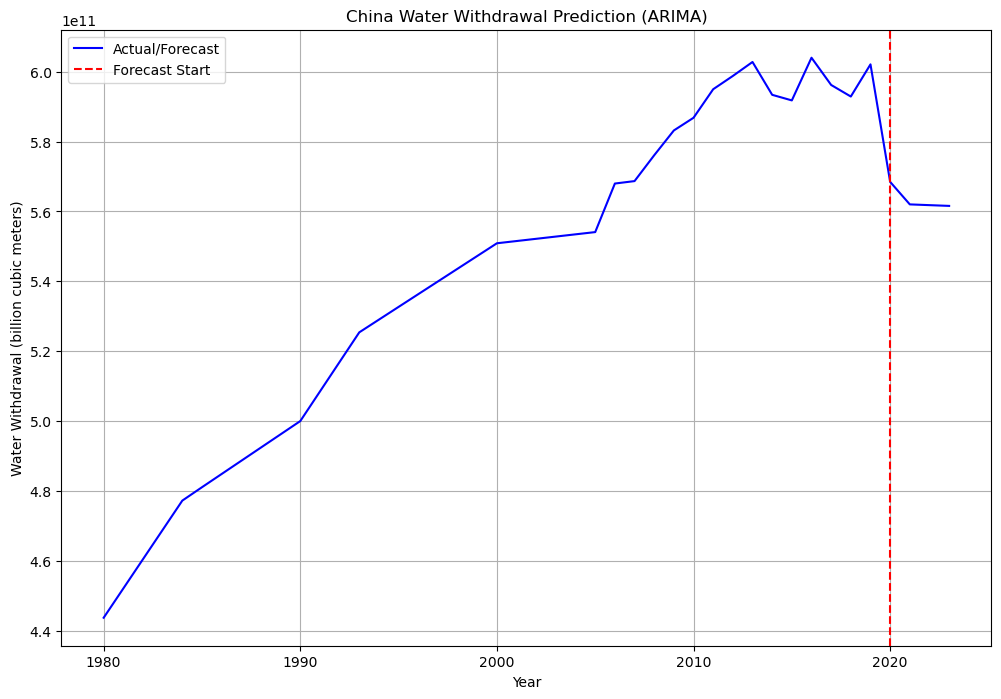

41    5.620304e+11
42    5.618141e+11
43    5.615999e+11
Name: predicted_mean, dtype: float64


In [9]:
forecast = model_fit.forecast(steps=3) #prediction for 2021,2022 and 2023
# Create a new DataFrame for the forecast with appropriate indices (2021, 2022)
forecast_years = pd.DataFrame(forecast.values, index=[2021,2022, 2023], columns=['Water_Withdrawal'])

# Concatenate the historical data with the forecasted data
df_chn_forecast = pd.concat([df_chn[['Water_Withdrawal']], forecast_years])

plt.figure(figsize=(12, 8))
plt.plot(df_chn_forecast.index, df_chn_forecast['Water_Withdrawal'], label='Actual/Forecast', color='blue')
plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Water Withdrawal (billion cubic meters)')
plt.title('China Water Withdrawal Prediction (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
print(forecast)

In [78]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(df_chn) * 0.8)  # 80% training, 20% testing data
train, test = df_chn['Water_Withdrawal'][:train_size], df_chn['Water_Withdrawal'][train_size:]
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
forecast_test = model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)
accuracy = 100 * (1 - mape)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Accuracy: 98.73%
Mean Absolute Percentage Error (MAPE): 0.0127
Mean Absolute Error (MAE): 7418777054.8067
Mean Squared Error (MSE): 114317741890146697216.0000
Root Mean Squared Error (RMSE): 10691947525.5983


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# France

In [53]:
from pmdarima import auto_arima
# Auto ARIMA to suggest the best p, d, q values
auto_model = auto_arima(df_fra['Water_Withdrawal'], seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -887.720
Date:                Sun, 15 Sep 2024   AIC                           1777.441
Time:                        15:48:07   BIC                           1779.129
Sample:                             0   HQIC                          1778.051
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.08e+18   2.72e+17      3.973      0.000    5.47e+17    1.61e+18
Ljung-Box (L1) (Q):                   6.23   Jarque-Bera (JB):                 4.75
Prob(Q):                              0.01   Pr

In [54]:
from statsmodels.tsa.arima.model import ARIMA
df_fra = df[df['Code'] == 'FRA'] # Filter dataset for France
df_fra = df_fra.drop_duplicates(subset='Year').set_index('Year') #drop duplicates based on the 'Year' column
df_fra['Water_Withdrawal'] = df_fra['Annual freshwater withdrawals, total (billion cubic meters)']

# ARIMA model (p=1, d=0, q=1)
model = ARIMA(df_fra['Water_Withdrawal'], order=(0, 1, 0))
model_fit = model.fit()
model_fit.summary()

C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Water_Withdrawal   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -887.720
Date:                Sun, 15 Sep 2024   AIC                           1777.441
Time:                        15:48:19   BIC                           1779.129
Sample:                             0   HQIC                          1778.051
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.08e+18   2.72e+17      3.973      0.000    5.47e+17    1.61e+18
===================================================================================
Ljung-Box (L1) (Q):                   6.23   Jarque-Bera (JB):                 4.75
Prob(Q):                              0.01   Prob(JB):                         0.09
Heteroskedasticity (H):               1.93   Skew:                            -0.73
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
adfuller_test(df_fra['Water_Withdrawal'])

ADF Test Statistic : -0.9038249764024554
p-value : 0.7867101883107275
#Lags Used : 1
Number of Observations Used : 39


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


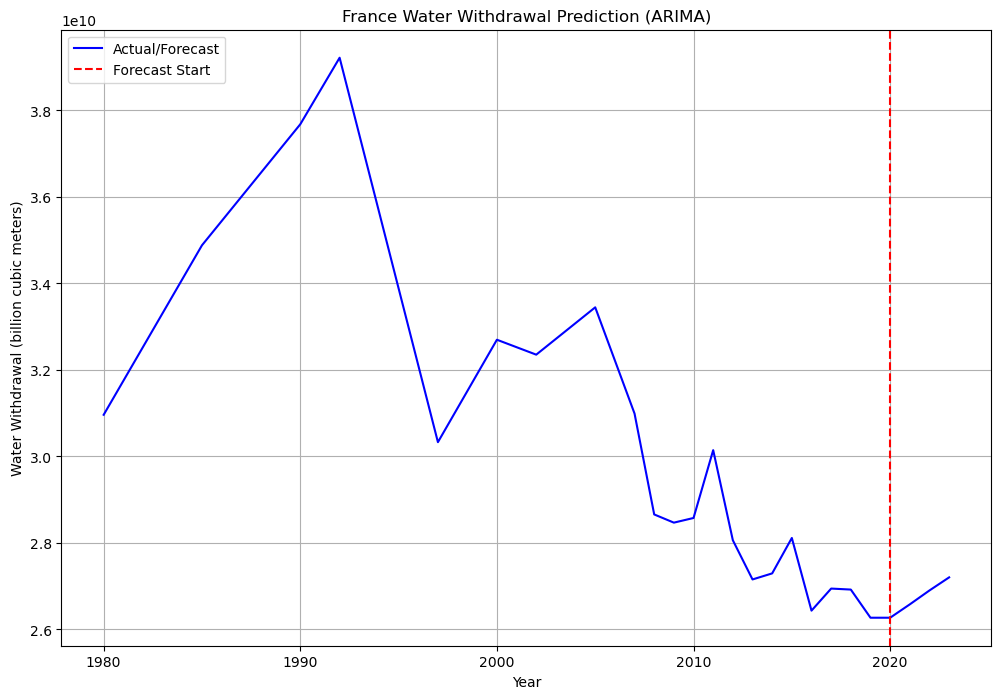

41    2.658095e+10
42    2.690259e+10
43    2.720495e+10
Name: predicted_mean, dtype: float64


In [13]:
forecast = model_fit.forecast(steps=3) #prediction for 2021,2022 and 2023
# Create a new DataFrame for the forecast with appropriate indices (2021, 2022, 2023)
forecast_years = pd.DataFrame(forecast.values, index=[2021, 2022,2023], columns=['Water_Withdrawal'])

# Concatenate the historical data with the forecasted data
df_fra_forecast = pd.concat([df_fra[['Water_Withdrawal']], forecast_years])

plt.figure(figsize=(12, 8))
plt.plot(df_fra_forecast.index, df_fra_forecast['Water_Withdrawal'], label='Actual/Forecast', color='blue')
plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Water Withdrawal (billion cubic meters)')
plt.title('France Water Withdrawal Prediction (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
print(forecast)

In [79]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(df_fra) * 0.8)  # 80% training, 20% testing data
train, test = df_fra['Water_Withdrawal'][:train_size], df_fra['Water_Withdrawal'][train_size:]
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
forecast_test = model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)
accuracy = 100 * (1 - mape)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Accuracy: 81.93%
Mean Absolute Percentage Error (MAPE): 0.1807
Mean Absolute Error (MAE): 4861799574.2690
Mean Squared Error (MSE): 24704569977566019584.0000
Root Mean Squared Error (RMSE): 4970369199.3217


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Great Britain

In [56]:
from pmdarima import auto_arima
# Auto ARIMA to suggest the best p, d, q values
auto_model = auto_arima(df_gbr['Water_Withdrawal'], seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -873.948
Date:                Sun, 15 Sep 2024   AIC                           1749.895
Time:                        15:54:07   BIC                           1751.584
Sample:                             0   HQIC                          1750.506
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.422e+17   3.02e+16     17.938      0.000    4.83e+17    6.01e+17
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1373.32
Prob(Q):                              0.95   Pr

In [58]:
 from statsmodels.tsa.arima.model import ARIMA
df_gbr = df[df['Code'] == 'GBR'] # Filter dataset for Great Britain
df_gbr = df_gbr.drop_duplicates(subset='Year').set_index('Year') #drop duplicates based on the 'Year' column
df_gbr['Water_Withdrawal'] = df_gbr['Annual freshwater withdrawals, total (billion cubic meters)']

# ARIMA model (p=1, d=0, q=1)
model = ARIMA(df_gbr['Water_Withdrawal'], order=(0, 1, 0))
model_fit = model.fit()
model_fit.summary()

C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Water_Withdrawal   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -873.948
Date:                Sun, 15 Sep 2024   AIC                           1749.895
Time:                        15:54:24   BIC                           1751.584
Sample:                             0   HQIC                          1750.506
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.422e+17   3.02e+16     17.938      0.000    4.83e+17    6.01e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1373.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                            -5.00
Prob(H) (two-sided):                  0.27   Kurtosis:                        29.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
adfuller_test(df_gbr['Water_Withdrawal'])

ADF Test Statistic : -1.1804858365076656
p-value : 0.6819333817735764
#Lags Used : 0
Number of Observations Used : 40


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


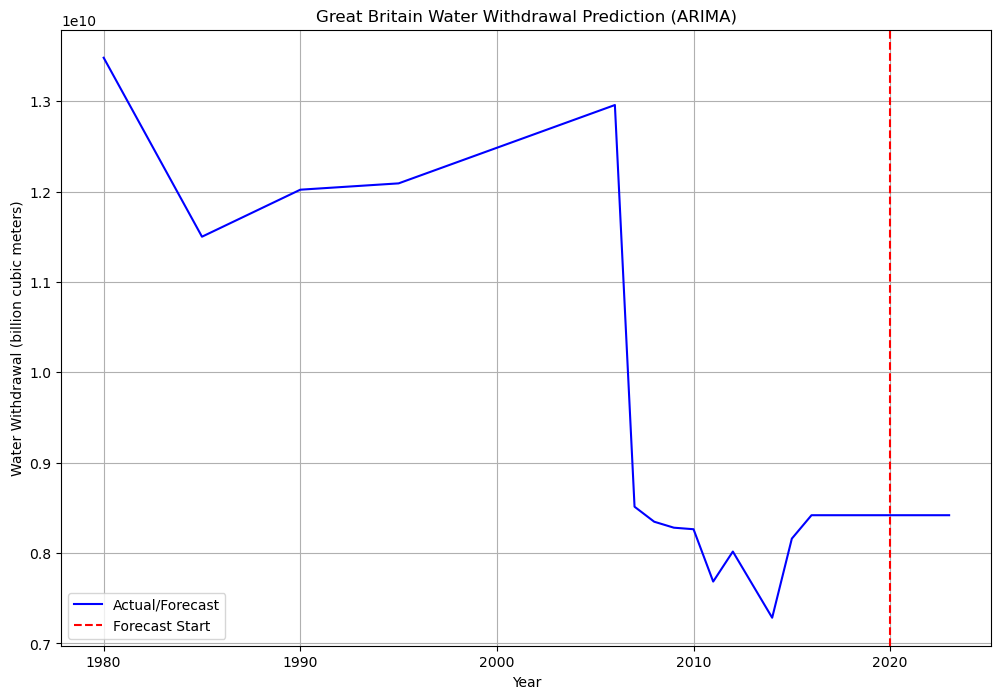

41    8.419000e+09
42    8.419000e+09
43    8.419000e+09
Name: predicted_mean, dtype: float64


In [60]:
forecast = model_fit.forecast(steps=3) #prediction for 2021,2022 and 2023
# Create a new DataFrame for the forecast with appropriate indices (2021, 2022,2023)
forecast_years = pd.DataFrame(forecast.values, index=[2021, 2022,2023], columns=['Water_Withdrawal'])

# Concatenate the historical data with the forecasted data
df_gbr_forecast = pd.concat([df_gbr[['Water_Withdrawal']], forecast_years])

plt.figure(figsize=(12, 8))
plt.plot(df_gbr_forecast.index, df_gbr_forecast['Water_Withdrawal'], label='Actual/Forecast', color='blue')
plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Water Withdrawal (billion cubic meters)')
plt.title('Great Britain Water Withdrawal Prediction (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
print(forecast)

In [80]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(df_gbr) * 0.8)  # 80% training, 20% testing data
train, test = df_gbr['Water_Withdrawal'][:train_size], df_gbr['Water_Withdrawal'][train_size:]
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
forecast_test = model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)
accuracy = 100 * (1 - mape)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Accuracy: 85.79%
Mean Absolute Percentage Error (MAPE): 0.1421
Mean Absolute Error (MAE): 1158411554.8135
Mean Squared Error (MSE): 1614412561262048512.0000
Root Mean Squared Error (RMSE): 1270595357.0126


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# USA

In [19]:
 from statsmodels.tsa.arima.model import ARIMA
df_usa = df[df['Code'] == 'USA'] # Filter dataset for USA
df_usa = df_usa.drop_duplicates(subset='Year').set_index('Year') #drop duplicates based on the 'Year' column
df_usa['Water_Withdrawal'] = df_usa['Annual freshwater withdrawals, total (billion cubic meters)']

# ARIMA model (p=1, d=0, q=1)
model = ARIMA(df_usa['Water_Withdrawal'], order=(1, 0, 1))
model_fit = model.fit()
model_fit.summary()

C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Water_Withdrawal   No. Observations:                   41
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -967.930
Date:                Sun, 15 Sep 2024   AIC                           1943.859
Time:                        13:19:40   BIC                           1950.713
Sample:                             0   HQIC                          1946.355
                                 - 41                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.657e+11   4.55e-13   1.02e+24      0.000    4.66e+11    4.66e+11
ar.L1          0.9806      0.029     33.373      0.000       0.923       1.038
ma.L1          0.5740      0.158      3.628      0.000       0.264       0.884
sigma2      1.969e+19   1.18e-21   1.68e+40      0.000    1.97e+19    1.97e+19
===================================================================================
Ljung-Box (L1) (Q):                   1.89   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.17   Prob(JB):                         0.17
Heteroskedasticity (H):               2.48   Skew:                            -0.35
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.14e+56. Standard errors may be unstable.
"""

In [20]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
adfuller_test(df_usa['Water_Withdrawal'])

ADF Test Statistic : -1.5993270488347504
p-value : 0.4839315086226375
#Lags Used : 6
Number of Observations Used : 34


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


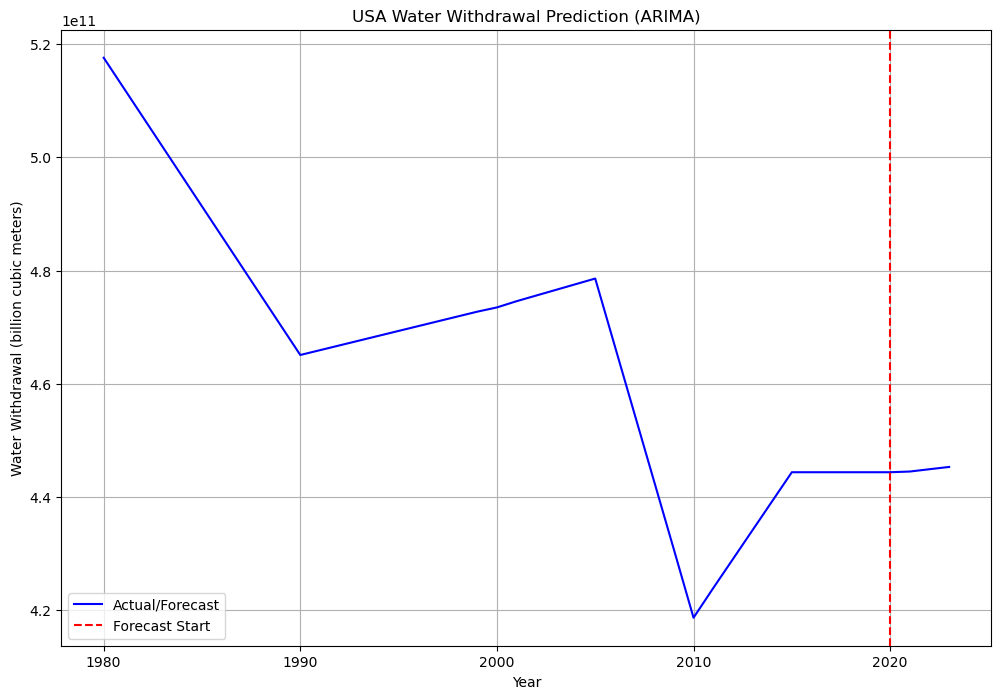

41    4.445170e+11
42    4.449264e+11
43    4.453279e+11
Name: predicted_mean, dtype: float64


In [21]:
forecast = model_fit.forecast(steps=3) #prediction for 2021,2022 and 2023
# Create a new DataFrame for the forecast with appropriate indices (2021, 2022,2023)
forecast_years = pd.DataFrame(forecast.values, index=[2021, 2022,2023], columns=['Water_Withdrawal'])

# Concatenate the historical data with the forecasted data
df_usa_forecast = pd.concat([df_usa[['Water_Withdrawal']], forecast_years])

plt.figure(figsize=(12, 8))
plt.plot(df_usa_forecast.index, df_usa_forecast['Water_Withdrawal'], label='Actual/Forecast', color='blue')
plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Water Withdrawal (billion cubic meters)')
plt.title('USA Water Withdrawal Prediction (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
print(forecast)

In [81]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(df_usa) * 0.8)  # 80% training, 20% testing data
train, test = df_usa['Water_Withdrawal'][:train_size], df_usa['Water_Withdrawal'][train_size:]
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
forecast_test = model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)
accuracy = 100 * (1 - mape)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Accuracy: 98.50%
Mean Absolute Percentage Error (MAPE): 0.0150
Mean Absolute Error (MAE): 6622047564.1615
Mean Squared Error (MSE): 51573953001251364864.0000
Root Mean Squared Error (RMSE): 7181500748.5380


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index i

# Russia

In [29]:
 from statsmodels.tsa.arima.model import ARIMA
df_rus = df[df['Code'] == 'RUS'] # Filter dataset for Russia
df_rus = df_rus.drop_duplicates(subset='Year').set_index('Year') #drop duplicates based on the 'Year' column
df_rus['Water_Withdrawal'] = df_rus['Annual freshwater withdrawals, total (billion cubic meters)']

# ARIMA model (p=1, d=0, q=1)
model = ARIMA(df_rus['Water_Withdrawal'], order=(1, 0, 1))
model_fit = model.fit()
model_fit.summary()

C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Water_Withdrawal   No. Observations:                   29
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -694.707
Date:                Sun, 15 Sep 2024   AIC                           1397.413
Time:                        13:24:33   BIC                           1402.882
Sample:                             0   HQIC                          1399.126
                                 - 29                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.903e+10   7.98e-14   8.65e+23      0.000     6.9e+10     6.9e+10
ar.L1          0.9773      0.011     90.967      0.000       0.956       0.998
ma.L1         -0.1784      0.076     -2.358      0.018      -0.327      -0.030
sigma2      1.258e+19   8.15e-22   1.54e+40      0.000    1.26e+19    1.26e+19
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.22   Prob(JB):                         0.96
Heteroskedasticity (H):               0.40   Skew:                            -0.03
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.06e+55. Standard errors may be unstable.
"""

In [30]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
adfuller_test(df_rus['Water_Withdrawal'])

ADF Test Statistic : -3.622667722804306
p-value : 0.005342167212922595
#Lags Used : 4
Number of Observations Used : 24


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


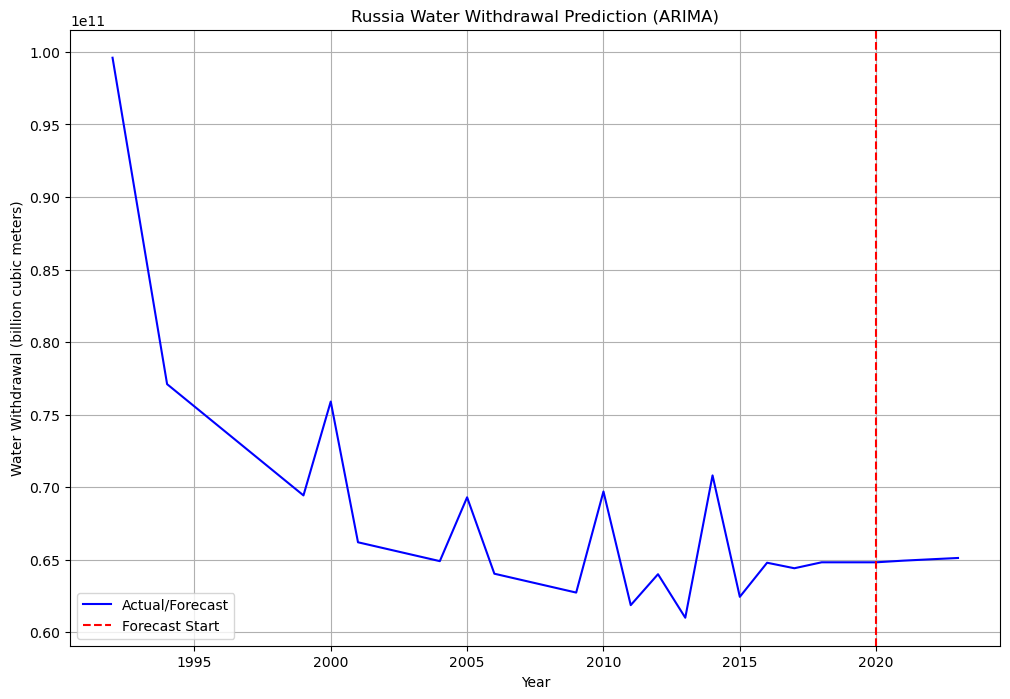

29    6.493424e+10
30    6.502722e+10
31    6.511809e+10
Name: predicted_mean, dtype: float64


In [21]:
forecast = model_fit.forecast(steps=3) #prediction for 2021,2022 and 2023
# Create a new DataFrame for the forecast with appropriate indices (2021, 2022,2023)
forecast_years = pd.DataFrame(forecast.values, index=[2021, 2022,2023], columns=['Water_Withdrawal'])

# Concatenate the historical data with the forecasted data
df_rus_forecast = pd.concat([df_rus[['Water_Withdrawal']], forecast_years])

plt.figure(figsize=(12, 8))
plt.plot(df_rus_forecast.index, df_rus_forecast['Water_Withdrawal'], label='Actual/Forecast', color='blue')
plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Water Withdrawal (billion cubic meters)')
plt.title('Russia Water Withdrawal Prediction (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
print(forecast)

In [84]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(df_rus) * 0.8)  # 80% training, 20% testing data
train, test = df_rus['Water_Withdrawal'][:train_size], df_rus['Water_Withdrawal'][train_size:]
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
forecast_test = model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)
accuracy = 100 * (1 - mape)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Accuracy: 90.78%
Mean Absolute Percentage Error (MAPE): 0.0922
Mean Absolute Error (MAE): 5917643275.2544
Mean Squared Error (MSE): 35771074077158326272.0000
Root Mean Squared Error (RMSE): 5980892414.7788


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# India

In [86]:
from statsmodels.tsa.arima.model import ARIMA
df_ind = df[df['Code'] == 'IND'] # Filter dataset for India
df_ind = df_ind.drop_duplicates(subset='Year').set_index('Year') #drop duplicates based on the 'Year' column
df_ind['Water_Withdrawal'] = df_ind['Annual freshwater withdrawals, total (billion cubic meters)']

# ARIMA model (p=1, d=0, q=1)
model = ARIMA(df_ind['Water_Withdrawal'], order=(1, 0, 1))
model_fit = model.fit()
model_fit.summary()

C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Water_Withdrawal   No. Observations:                   46
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1120.506
Date:                Sun, 15 Sep 2024   AIC                           2249.013
Time:                        19:41:52   BIC                           2256.327
Sample:                             0   HQIC                          2251.753
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.603e+11   4.69e-15   1.19e+26      0.000     5.6e+11     5.6e+11
ar.L1          0.9960      0.010    104.797      0.000       0.977       1.015
ma.L1          0.3918      0.099      3.968      0.000       0.198       0.585
sigma2       7.62e+19   4.88e-22   1.56e+41      0.000    7.62e+19    7.62e+19
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):               290.81
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+56. Standard errors may be unstable.
"""

In [87]:
def adfuller_test(Water_Withdrawal):
    result=adfuller(Water_Withdrawal)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
adfuller_test(df_ind['Water_Withdrawal'])

ADF Test Statistic : -3.479276181321154
p-value : 0.008535552520181197
#Lags Used : 0
Number of Observations Used : 45


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


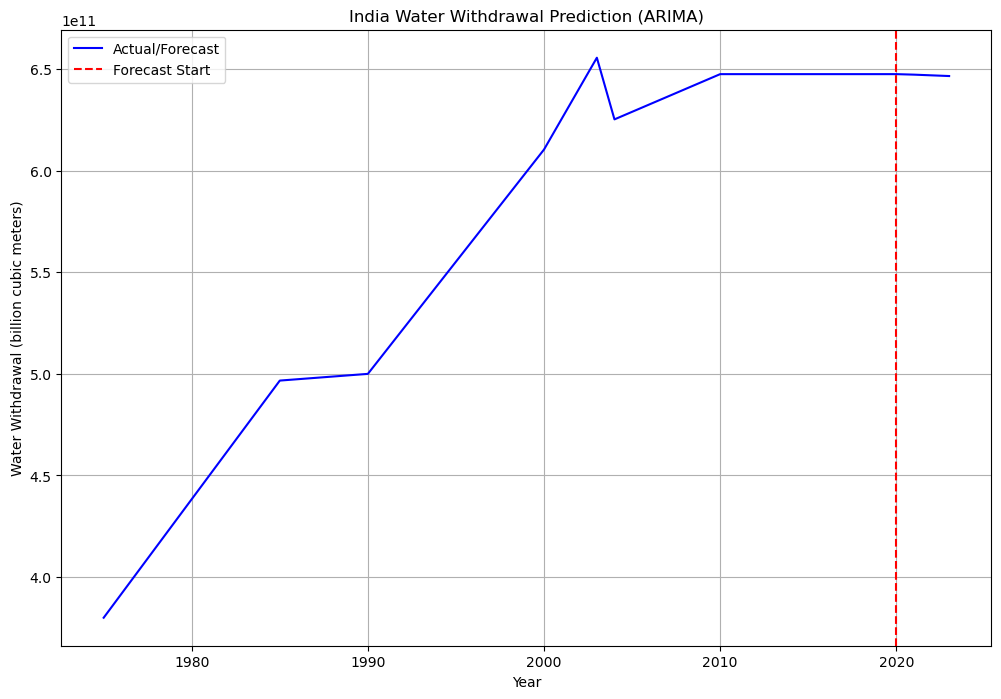

46    6.472522e+11
47    6.469081e+11
48    6.465654e+11
Name: predicted_mean, dtype: float64


In [88]:
forecast = model_fit.forecast(steps=3) #prediction for 2021, 2022,2023
# Create a new DataFrame for the forecast with appropriate indices (2021, 2022,2023)
forecast_years = pd.DataFrame(forecast.values, index=[2021, 2022,2023], columns=['Water_Withdrawal'])

# Concatenate the historical data with the forecasted data
df_ind_forecast = pd.concat([df_ind[['Water_Withdrawal']], forecast_years])

plt.figure(figsize=(12, 8))
plt.plot(df_ind_forecast.index, df_ind_forecast['Water_Withdrawal'], label='Actual/Forecast', color='blue')
plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Water Withdrawal (billion cubic meters)')
plt.title('India Water Withdrawal Prediction (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()
print(forecast)

In [89]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(df_ind) * 0.8)  # 80% training, 20% testing data
train, test = df_ind['Water_Withdrawal'][:train_size], df_ind['Water_Withdrawal'][train_size:]
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
forecast_test = model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)
mse = mean_squared_error(test, forecast_test)
rmse = np.sqrt(mse)
accuracy = 100 * (1 - mape)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Accuracy: 99.60%
Mean Absolute Percentage Error (MAPE): 0.0040
Mean Absolute Error (MAE): 2605426935.5584
Mean Squared Error (MSE): 9897799275965886464.0000
Root Mean Squared Error (RMSE): 3146076807.0672


C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mainak ghosh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
